# Plotting profiles

This notebook demonstrates plotting profiles using xarray and matplotlib.

We require some of the post-processed data. Copy the data from the post-processing folder to the data folder, e.g.
```
cp /path/to/LeConte_postprocessing/proc/combo_sep_2018.nc /path/to/LeConte_examples/data/
```
editing the paths as appropriate for your system.

You also need to have installed the `lcexamples` conda environment and kernel (see instructions in the README).



In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from cmocean import cm

Open the netcdf data.

In [2]:
ds = xr.open_dataset("../data/combo_sep_2018.nc")

Display the dataset contents.

In [3]:
ds

<xarray.Dataset>
Dimensions:       (depth: 300, depth_mid: 299, profile: 169, section: 19)
Coordinates:
  * profile       (profile) int64 1 2 3 4 5 6 7 ... 163 164 165 166 167 168 169
  * depth         (depth) float64 1.0 2.0 3.0 4.0 ... 297.0 298.0 299.0 300.0
  * depth_mid     (depth_mid) float64 1.5 2.5 3.5 4.5 ... 297.5 298.5 299.5
    time          (profile) datetime64[ns] ...
    lon           (profile) float64 ...
    lat           (profile) float64 ...
    cast          (profile) int64 ...
    p             (depth) float64 ...
    p_mid         (depth_mid) float64 ...
  * section       (section) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19
    insection     (section, profile) bool ...
    time_start    (section) datetime64[ns] ...
    time_end      (section) datetime64[ns] ...
    lon_start     (section) float64 ...
    lon_end       (section) float64 ...
    lat_start     (section) float64 ...
    lat_end       (section) float64 ...
    lon_sadcp     (profile) float64 ...
    lat_sadcp     (profile) float64 ...
Data variables:
    C             (depth, profile) float64 ...
    SP            (depth, profile) float64 ...
    t             (depth, profile) float64 ...
    CT            (depth, profile) float64 ...
    SA            (depth, profile) float64 ...
    eps1          (depth, profile) float64 ...
    eps2          (depth, profile) float64 ...
    Kv1           (depth, profile) float64 ...
    Kv2           (depth, profile) float64 ...
    sig0          (depth, profile) float64 ...
    N2            (depth_mid, profile) float64 ...
    N2_ref        (depth, profile) float64 ...
    Lo1           (depth, profile) float64 ...
    Lo2           (depth, profile) float64 ...
    depth_max     (profile) float64 ...
    u             (depth, profile) float64 ...
    v             (depth, profile) float64 ...
    w             (depth, profile) float64 ...
    range_bottom  (profile) float64 ...
    nav           (profile) float64 ...

Extract a single profile of conservative temperature at random and plot using both xarray's interface and the matplotlib interface. For quick investigation of a dataset, xarray's interface is very convenient. However, for clean publication worthy figures, it is better to use matplotlib directly.

Text(0, 0.5, 'Depth (m)')

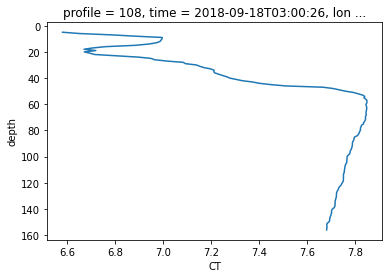

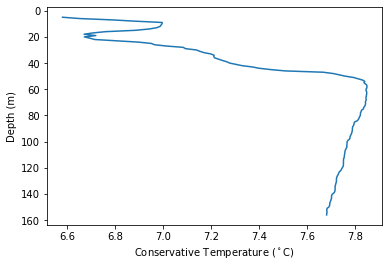

In [4]:
profile = ds.isel(profile=107)

# Using xarray interface
fig, ax = plt.subplots()
profile.CT.plot(ax=ax, y="depth", yincrease=False)

# Using matplotlib.pyplot
fig, ax = plt.subplots()
ax.plot(profile.CT, profile.depth)
ax.invert_yaxis()
ax.set_xlabel("Conservative Temperature ($^\circ$C)")
ax.set_ylabel("Depth (m)")

Plot a section at random.

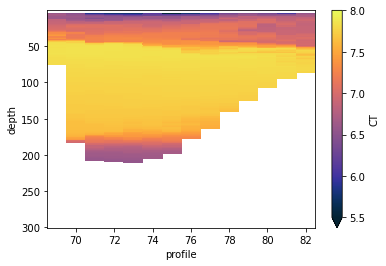

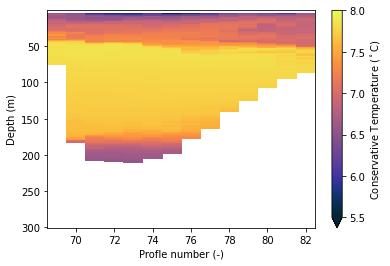

In [5]:
insec = ds.insection.isel(section=9)
section = ds.isel(profile=insec.values)

# Using xarray
fig, ax = plt.subplots()
section.CT.plot(ax=ax, yincrease=False, cmap=cm.thermal, vmin=5.5, vmax=8)

# Using matplotlib explicitly
fig, ax = plt.subplots()
ax.invert_yaxis()
PC = ax.pcolormesh(
    section.profile,
    section.depth,
    section.CT,
    shading="auto",
    cmap=cm.thermal,
    vmin=5.5,
    vmax=8,
)
cb = plt.colorbar(PC, extend="min")
ax.set_xlabel("Profle number (-)")
ax.set_ylabel("Depth (m)")
cb.set_label("Conservative Temperature ($^\circ$C)")